## Primer on probability

### Product rule: 

* If the variables A, B are independent:
    * $P(A,B)= P(A)P(B)$
    
* If they are dependent:
    * $P(A,B) = P(A)P(B|A)$
    
E.g. the probability that two coins will land heads is $0.5 \times 0.5 = 0.25$
    
**Side note:** This is obviously the source of Bayes' rule. A potentially interesting observation for the clueless like myself is its pre-final form:

$$P(A)P(B|A) = P(B)P(A|B)$$

This is reminiscent of "detailed balance".


### Sum rule:

$$P(A) = \Sigma_{B}P(A,B)$$

## Stochastic recursion

This refers to whether or not we can randomly decide when a condition is met. For example, the *geometric distribution*. This is basically a cumulative "survival function" over how many times we can move forward until the probabilistic condition is met.

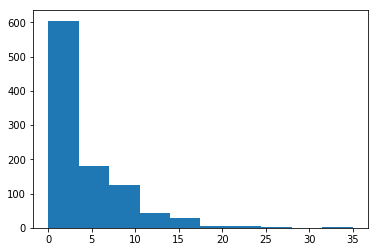

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def geometric(p):
    if np.random.rand() > p:
        return 1 + geometric(p)
    else:
        return 0
    
plt.hist([geometric(0.2) for k in range(1000)]);

In [24]:
def eyeColor(person): 
# Note that you can use inputs that don't appear in the function
    colors = ["blue", "green", "brown"]
    return colors[np.random.randint(len(colors))]

We can use memoization! This basically stores the value of a given computation and makes things like recursion much more efficient. This is also helpful with probabilistic programs since we can store the results of random draws. 

In [32]:
print([eyeColor('bob') for _ in range(10)])

['blue', 'blue', 'blue', 'green', 'green', 'blue', 'green', 'brown', 'green', 'blue']


In [33]:
mem_clr = memoize(eyeColor)
print([mem_clr('bob') for _ in range(10)])

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


In [3]:
def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:            
            memo[x] = f(x)
        return memo[x]
    return helper